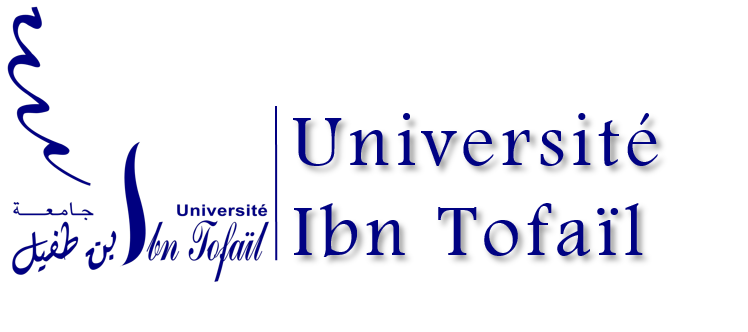

<center><h2 style="color:#023182;text-transform: uppercase;font-family:algerian;font-size:40px">TP N°3: la normalisation </h2></center>  

<hr style="border:2px solid black">

<i>La normalisation est une opération du pré-traitement de données qui a pour but de mettre sur une même échelle toutes les variables quantitatives. Supposons qu’on ait à comparer les variables taille et âge. Ces deux variables n’étant pas sur une même échelle de grandeur, la comparaison n’aura pas véritablement de sens. Une mise à échelle est nécessaire pour mettre nos variables sur la même échelle, c’est ce qui facilitera la comparaison et lui donnera du sens.</i>

<h1 style="font-family:algerian; color:black;" >pour quoi la normalisation ?</h1>

<ol>
    <li><b>La normalisation</b> facilite l’apprentissage des modèles de Machine Learning qui sont basés sur la descente du gradient, les calculs de distance ou les calculs de variance.</li>
    <li><b>La normalisation</b> égalise le poids de chaque dimension dans le but d’éviter que les variables ayant de grandes valeurs  soient considérées plus importantes que les variables ayant des valeurs moins grandes, d’où l’importance de l’application au préalable de certains algorithmes de clustering.</li>
    <li><b>La normalisation</b> standardise la moyenne et l’écart-type de tout type de distribution de données, ce qui permet de simplifier le problème d’apprentissage en s’affranchissant de ces deux paramètres.</li></ol>

<h1 style="font-family:algerian; color:black;" >Les différents types de normalisation</h1>

<fieldset><legend>Normalisation Min-Max</legend>
Le procédé de normalisation Min-Max utilise le minimum et le maximum de la variable. L’idée est de ramener toutes les valeurs de la variable dans l’intervalle [0;1], tout en conservant le rapport des distances entre les valeurs. Pour le réaliser on utilise la formule suivante:
</fieldset>

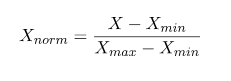

<fieldset><legend>Standardisation</legend>
Pour ce qui est de la standardisation, la transformation a pour but de ramener la moyenne μ à 0 et l’écart-type σ à 1. Encore une fois, le procédé est simple si on a à notre disposition la moyenne μ et l’écart-type σ de la variable, la formule pour le faire est la suivante :
</fieldset>

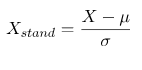

Ces deux techniques sont sensibles aux valeurs aberrantes, donc moins efficaces. Pour des variables ayant des valeurs aberrantes, il est préférable d’utiliser la normalisation robuste qui est peu sensible aux valeurs aberrantes.

<fieldset><legend>Robuste</legend>
Cette technique transforme chaque variable en étant peu sensible aux outliers (valeurs aberrantes). Le procédé est le suivant: on soustrait aux valeurs de la variable la médiane (la médiane est une valeur de la variable qui permet de séparer ses valeurs en deux parties égales) et on divise par l’écart interquartile IQR (IQR est une mesure de dispersion qui s’obtient en faisant la différence entre le troisième et le premier quartile) la formule est la suivante:
</fieldset>

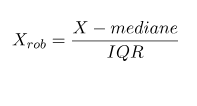

<hr style="border:2px solid black">

<h1 style="font-family:Castellar;font-size:60px">I-Rappel</h1>

<hr style="border:2px solid black">

In [191]:
# importer les bibliothèques
import numpy as np #................
import pandas as pd #.................
import matplotlib.pyplot as plt #..................
import seaborn as sns #.......................

In [192]:
data= pd.read_csv("data/insurance.csv")

In [193]:
# Q1:vérifier les dimensions(data)
data.shape


(1338, 7)

In [194]:
# Q2:afficher les dix premiers enregistrements (data)
data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [195]:
# Q3:Présentez les données statistiques de notre base de données.
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [196]:
# Q4:Affichez les noms des différentes colonnes.
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [197]:
# Q5:Présentez les modalités de la colonne "région" et comptez le nombre d'occurrences de chaque modalité.
data['region'].value_counts()



region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [198]:
# Q6:Présentez les modalités de la colonne "sex" et comptez le nombre d'occurrences de chaque modalité.
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [199]:
# Q7:supprimez la colonne 'région'.
data.drop(columns='region')

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,10600.55
1334,18,female,31.9,0,no,2205.98
1335,18,female,36.9,0,no,1629.83
1336,21,female,25.8,0,no,2007.95


In [200]:
# Q8:Encodez la deuxième colonne (sexe) en attribuant la valeur 1 pour "homme" (male) et 0 pour "femme" (female).
for i in range(data.shape[0]) :
    if data.loc[i,'sex'] == 'male' :
        data.loc[i,'sex'] = 1
    else :
        data.loc[i,'sex'] = 0
data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


<Axes: xlabel='bmi', ylabel='Count'>

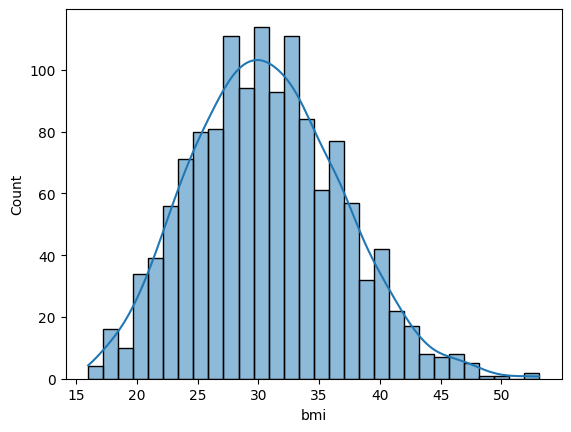

In [201]:
# Q9:Affichez les histogrammes pour les trois variables :  bmi, âge (age) et dépenses (expenses).
# data['bmi'].plot.hist()
sns.histplot(data=data['bmi'], kde=True ,bins=30)


<Axes: xlabel='age', ylabel='Count'>

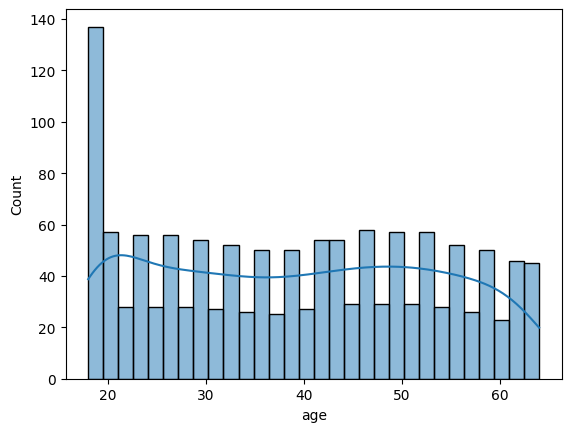

In [202]:
sns.histplot(data=data['age'], kde=True ,bins=30)

<Axes: xlabel='expenses', ylabel='Count'>

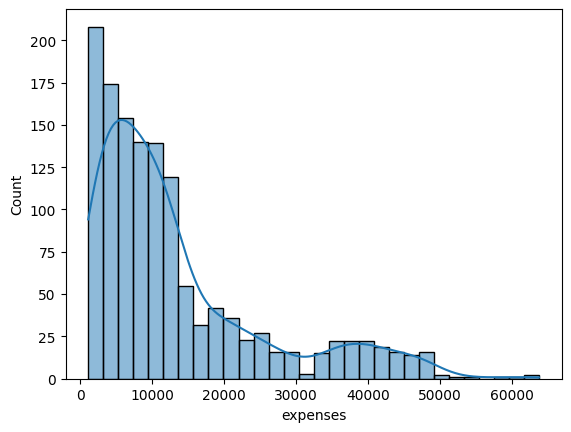

In [203]:
sns.histplot(data=data['expenses'], kde=True ,bins=30)

On observe des échelles différentes pour les trois variables.(bmi) entre [18-53], l'âge (age) sur une échelle de [18-64], et les dépenses (expenses) sur une échelle potentiellement plus large [1121-63770]. Il est essentiel de prendre en considération ces différences d'échelle lors de l'analyse pour une interprétation appropriée des données.

<hr style="border:2px solid black">

<h1 style="font-family:Castellar;font-size:60px">II-Normalisation</h1>

<hr style="border:2px solid black">

<h1 style="font-family:algerian; font-size:30px; color:red">A-Normalisation Min-Max</h1>

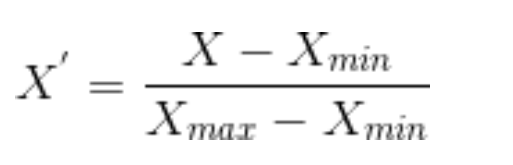

In [204]:
# Q10: prendre une copie de notre jeu de données. (df_normal).
df_normal = pd.read_csv('data/insurance.csv')
df_normal

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [205]:
# Q11: Présentez les données statistiques  'df_normal'.
df_normal.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [206]:
# Q12: Normalisez les deux variables quantitatives 'bmi' et 'expenses' en utilisant la formule ci-dessus.

In [207]:
# 'bmi'
for i in range(df_normal.shape[0]) :
    df_normal.loc[i , 'bmi'] = ( df_normal.loc[i , 'bmi'] - df_normal['bmi'].max() ) / (df_normal['bmi'].min() - df_normal['bmi'].max() )


In [208]:
# 'expenses'
for i in range(df_normal.shape[0]) :
    df_normal.loc[i , 'expenses'] = ( df_normal.loc[i , 'expenses'] - df_normal['expenses'].max() ) / (df_normal['expenses'].min() - df_normal['expenses'].max() )

In [209]:
df_normal

,age,sex,bmi,children,smoker,region,expenses
0,19,female,0.679245,0,yes,southwest,0.748389
1,18,male,0.368175,1,no,southeast,0.972953
2,28,male,0.381174,3,no,southeast,0.930238
3,33,male,0.576502,0,no,northwest,0.655264
4,32,male,0.458926,0,no,northwest,0.939372
...,...,...,...,...,...,...,...
1333,50,male,0.159892,3,no,northwest,0.636237
1334,18,female,0.135501,0,no,northeast,0.924301
1335,18,female,-0.000000,0,no,southeast,0.944072
1336,21,female,0.113402,0,no,southwest,0.931096


(array([  6.,  20.,  32.,  95., 196., 284., 321., 224., 129.,  31.]),
 array([0.        , 0.06996782, 0.13993565, 0.20990347, 0.27987129,
        0.34983911, 0.41980694, 0.48977476, 0.55974258, 0.6297104 ,
        0.69967823]),
 <BarContainer object of 10 artists>)

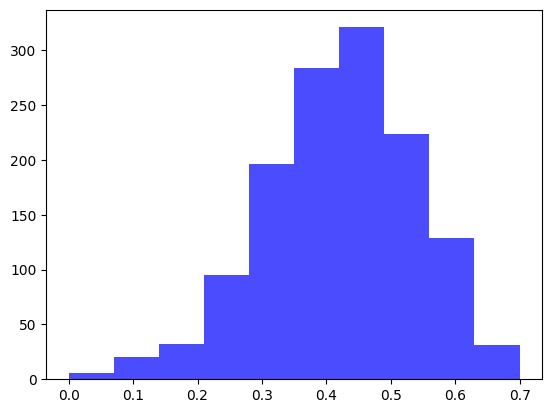

In [210]:
 # Q13: Affichez les histogrammes des deux variables, 'bmi' et 'expenses', avant et après la normalisation.
plt.hist(df_normal['bmi'], bins=10, color='blue', alpha=0.7)

In [211]:
# Q14: Qu'est-ce que vous remarquez?
# pas de changement 

<h1 style="font-family:algerian; font-size:30px; color:red">B-Standardisation</h1>

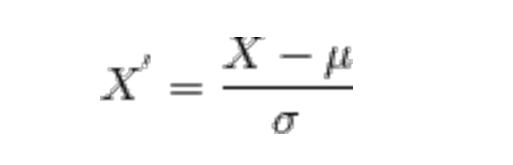

In [212]:
# Q15: prendre une copie de notre jeu de données. (df_std).
data = pd.read_csv('data/insurance.csv')
df_std = data.copy()
df_std


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [213]:
# Q16: Standardisez les deux variables quantitatives 'bmi' et 'expenses' en utilisant la formule ci-dessus.

In [214]:
# 'bmi'
std = np.std(df_std['bmi'])
mean = np.mean(df_std['bmi'])
for i in range(df_std.shape[0]) :
    df_std.loc[i , 'bmi'] = ( df_std.loc[i , 'bmi'] - mean ) / (std)

In [215]:
# 'expenses'
std = np.std(df_std['expenses'])
mean = np.mean(df_std['expenses'])
for i in range(df_std.shape[0]) :
    df_std.loc[i , 'expenses'] = ( df_std.loc[i , 'expenses'] - mean ) / (std)

df_std

,age,sex,bmi,children,smoker,region,expenses
0,19,female,-0.453646,0,yes,southwest,0.298583
1,18,male,0.514186,1,no,southeast,-0.953689
2,28,male,0.382954,3,no,southeast,-0.728675
3,33,male,-1.306650,0,no,northwest,0.719843
4,32,male,-0.289606,0,no,northwest,-0.776802
...,...,...,...,...,...,...,...
1333,50,male,0.054876,3,no,northwest,-0.220551
1334,18,female,0.202511,0,no,northeast,-0.914002
1335,18,female,1.022707,0,no,southeast,-0.961597
1336,21,female,-0.798128,0,no,southwest,-0.930361


Text(0.5, 1.0, 'depense apres')

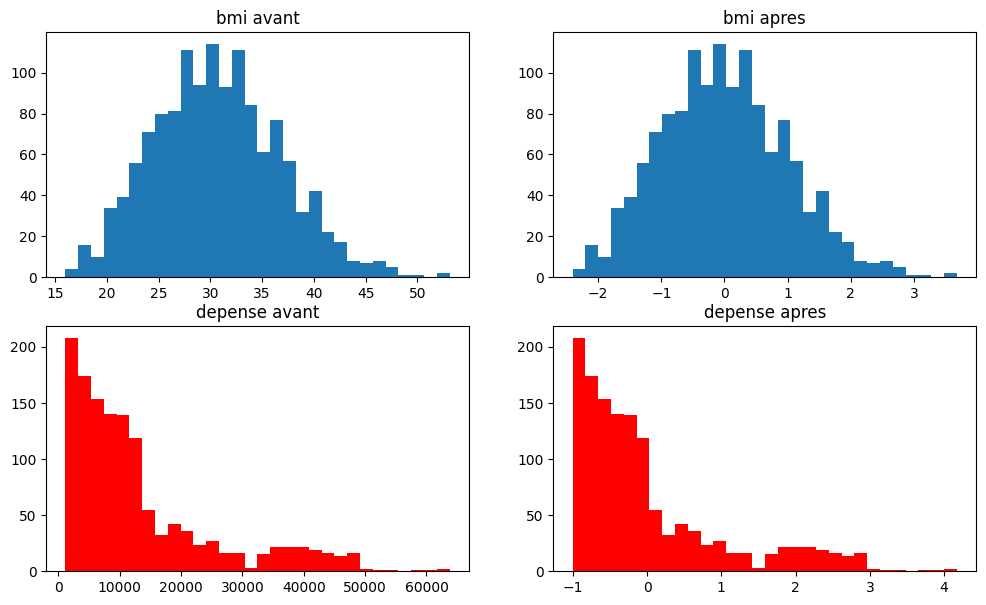

In [219]:
# Q17: Affichez les histogrammes des deux variables, 'bmi' et 'expenses', avant et après la standardisation.
plt.figure(figsize=(12, 7))  # Taille de la figure
plt.subplot(2, 2, 1)
plt.hist(data['bmi'], bins=30, label="avant")
plt.title("bmi avant")

plt.subplot(2, 2, 2)
plt.hist(df_std['bmi'], bins=30, label="apres")
plt.title("bmi apres")

plt.subplot(2, 2, 3)
plt.hist(data['expenses'], bins=30, label="avant", color="red")
plt.title("depense avant")

plt.subplot(2, 2, 4)
plt.hist(df_std['expenses'], bins=30, label="apres", color="red")
plt.title("depense apres")


In [217]:
# Q18: Qu'est-ce que vous remarquez?
il n y a pas un changement 

SyntaxError: invalid syntax (360301595.py, line 2)

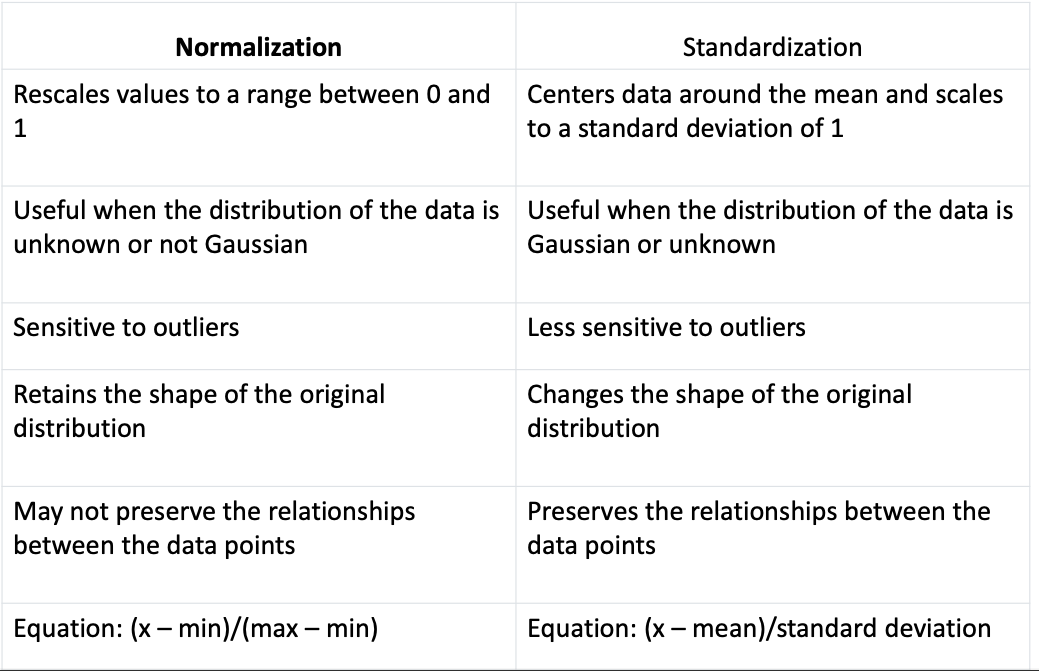

<hr style="border:solid 2px black">

<center><h1 style="font-family:Mistral; font-size:50px; color:green">Deuxième méthode de la standardisation Z-score (bibliothèque SCIPY)</h1></center>

<hr style="border:solid 2px black">

In [220]:
import scipy
from scipy import stats

In [221]:
df_zscore=data
df_zscore['bmi']=stats.zscore(df_zscore['bmi'])
df_zscore['expenses']=stats.zscore(df_zscore['expenses'])

In [223]:
# Q19: Présentez les données statistiques  'df_zscore'.
df_zscore

,age,sex,bmi,children,smoker,region,expenses
0,19,female,-0.453646,0,yes,southwest,0.298583
1,18,male,0.514186,1,no,southeast,-0.953689
2,28,male,0.382954,3,no,southeast,-0.728675
3,33,male,-1.306650,0,no,northwest,0.719843
4,32,male,-0.289606,0,no,northwest,-0.776802
...,...,...,...,...,...,...,...
1333,50,male,0.054876,3,no,northwest,-0.220551
1334,18,female,0.202511,0,no,northeast,-0.914002
1335,18,female,1.022707,0,no,southeast,-0.961597
1336,21,female,-0.798128,0,no,southwest,-0.930361


Text(0.5, 1.0, 'depense apres')

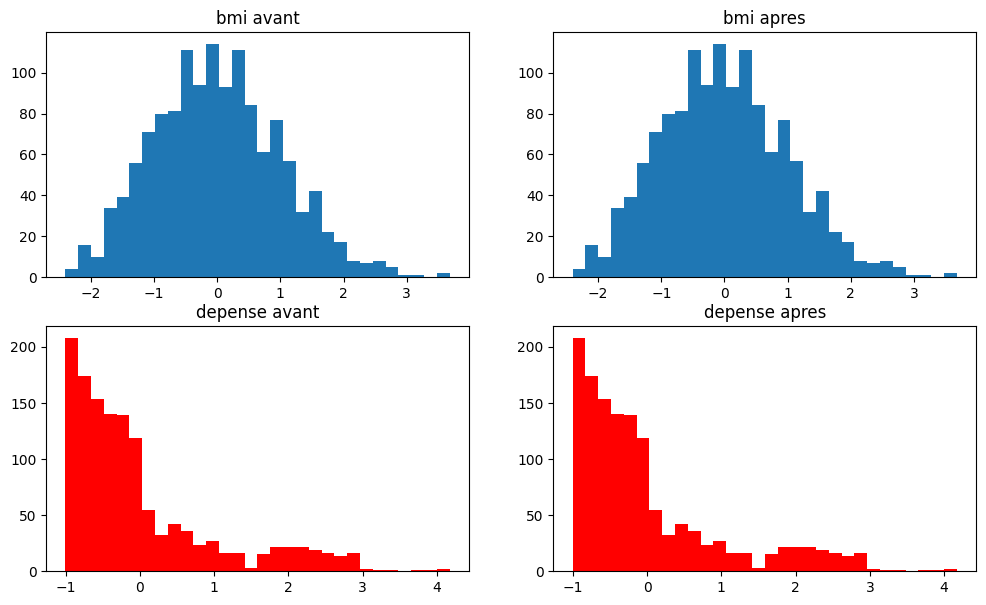

In [224]:
# Q20: Affichez les histogrammes des deux variables, 'bmi' et 'expenses', avant et après la standardisation.
plt.figure(figsize=(12, 7))  # Taille de la figure
plt.subplot(2, 2, 1)
plt.hist(data['bmi'], bins=30, label="avant")
plt.title("bmi avant")

plt.subplot(2, 2, 2)
plt.hist(df_zscore['bmi'], bins=30, label="apres")
plt.title("bmi apres")

plt.subplot(2, 2, 3)
plt.hist(data['expenses'], bins=30, label="avant", color="red")
plt.title("depense avant")

plt.subplot(2, 2, 4)
plt.hist(df_zscore['expenses'], bins=30, label="apres", color="red")
plt.title("depense apres")


<hr style="border:solid 2px black">

<center><h1 style="font-family:Mistral; font-size:50px; color:blue">la normalisation et  la standardisation  (bibliothèque Sklearn)</h1></center>

<hr style="border:solid 2px black">

In [231]:
#la normalisation : MinMaxScaler
#la standardisation : StandardScaler
# Robuste :RobustScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [233]:
x=data.iloc[:,[0,2]]
x

,age,bmi
0,19,-0.453646
1,18,0.514186
2,28,0.382954
3,33,-1.306650
4,32,-0.289606
...,...,...
1333,50,0.054876
1334,18,0.202511
1335,18,1.022707
1336,21,-0.798128


In [236]:
X_minmax = MinMaxScaler().fit_transform(x)
#x_StandardScaler=StandardScaler().fit_transform(x)
#x_RobustScaler=RobustScaler().fit_transform(x)
X_minmax

array([[0.02173913, 0.32075472],
       [0.        , 0.47978437],
       [0.2173913 , 0.45822102],
       ...,
       [0.        , 0.56334232],
       [0.06521739, 0.26415094],
       [0.93478261, 0.35309973]])

In [239]:
x['age']=X_minmax[:,0]
x['bmi']=X_minmax[:,1]
x

C:\Users\User\AppData\Local\Temp\ipykernel_11552\2997069891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age']=X_minmax[:,0]
C:\Users\User\AppData\Local\Temp\ipykernel_11552\2997069891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['bmi']=X_minmax[:,1]


,age,bmi
0,0.021739,0.320755
1,0.000000,0.479784
2,0.217391,0.458221
3,0.326087,0.180593
4,0.304348,0.347709
...,...,...
1333,0.695652,0.404313
1334,0.000000,0.428571
1335,0.000000,0.563342
1336,0.065217,0.264151


<h1 style="font-family:algerian; font-size:30px; color:red">Exercice à faire.</h1>

<hr style="border:dashed 4px red">

In [ ]:
# Question : Nettoyez le jeu de données 'covids' (dataset.csv) en appliquant l'une des méthodes de normalisation
# Supprimez les données vides.
# Encodez les variables qualitatives.
#....

In [245]:
data = pd.read_csv("data/dataset.csv",index_col=0 ,encoding = "ISO-8859-1")
data

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
